# **Practice: GNN (Deep Learning School)**

We will construct our own graph neural networks by using **PyTorch Geometric (PyG)** and apply the models on *Open Graph Benchmark (OGB)* and *MovieLens* datasets. Those two datasets are used to benchmark the model performance on two different graph-related tasks.
- One dataset in OGB is for node property prediction, predicting properties of single nodes.
- MovieLens is for link prediction, predicting if an edge exists between two nodes in a graph.

1.   First, we will learn how PyTorch Geometric stores the graphs in PyTorch tensor.
2.   We will then load and take a quick look on one of the Open Graph Benchmark (OGB) datasets by using the `ogb` package. OGB is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. The `ogb` package not only provides the data loader of the dataset but also the evaluator.
3.   Last, we will build our own graph neural networks by using PyTorch Geometric. And Then apply and evaluate the models on node property prediction and link prediction tasks.



**Note**: Make sure to **sequentially run all the cells in each section**, so that the intermediate variables / packages will carry over to the next cell.

Have fun!

# Device
You might need to use GPU for this Colab.

Please click `Runtime` and then `Change runtime type`. Then set the `hardware accelerator` to **GPU**.

# Installation

In [1]:
!pip install torch
!pip install torch-geometric


import torch
print(torch.__version__)

!pip install -q torch-scatter -f https://pytorch-geometric.com/whl/torch-2.5.0+cu121.html
!pip install -q torch-sparse -f https://pytorch-geometric.com/whl/torch-2.5.0+cu121.html
!pip install -q torch-geometric
!pip install ogb

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 63.1/63.1 kB 2.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.4 MB/s eta 0:00:00
2.5.0+cu121
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.9/10.9 MB 80.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.1/5.1 MB 54.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.8/78.8 kB 3.7 MB/s eta 0:00:00


# 1 PyTorch Geometric (Datasets and Data)


PyTorch Geometric generally has two classes for storing or transforming the graphs into tensor format. One is the `torch_geometric.datasets`, which contains a variety of common graph datasets. Another one is `torch_geometric.data` that provides the data handling of graphs in PyTorch tensors.

In this section, we will learn how to use the `torch_geometric.datasets` and `torch_geometric.data`.

## PyG Datasets

The `torch_geometric.datasets` has many common graph datasets. Here we will explore the usage by using one example dataset.

In [2]:
from torch_geometric.datasets import TUDataset

root = './enzymes'
name = 'ENZYMES'

# The ENZYMES dataset
pyg_dataset= TUDataset('./enzymes', 'ENZYMES')

# You can find that there are 600 graphs in this dataset

# ENZYMES is a dataset of protein tertiary structures obtained from (Borgwardt et al., 2005)
# consisting of 600 enzymes from the BRENDA enzyme database (Schomburg et al., 2004).
# In this case the task is to correctly assign each enzyme to one of the 6 classes.
# Nodes represent secondary structure elements and are annotated by their type,
# i.e., helix, sheet, or turn, as well as several physical and chemical information.
# An edge connects two nodes if they are neighbors along the amino acid sequence or
# one of three nearest neighbors in space.
# The taks is to asssign enzymes to on of the 6 EC (Enzyme Commision) top-level
# classes, which reflect the catalyzed chemical reaction.
print(pyg_dataset)

Processing...


ENZYMES(600)


Done!


## Question 1: What are the number of classes and the number of features in the ENZYMES dataset?

In [3]:
def get_num_classes(pyg_dataset):
  # TODO: Implement this function that takes a PyG dataset object
  # and return the number of classes for that dataset.

  num_classes = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.

  num_classes = pyg_dataset.num_classes

  #########################################

  return num_classes

def get_num_features(pyg_dataset):
  # TODO: Implement this function that takes a PyG dataset object
  # and return the number of features for that dataset.

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  ## Note
  ## 1. Colab autocomplete functionality might be useful.

  num_features = pyg_dataset.num_features

  #########################################

  return num_features

# You may find that some information need to be stored in the dataset level,
# specifically if there are multiple graphs in the dataset

num_classes = get_num_classes(pyg_dataset)
num_features = get_num_features(pyg_dataset)
print("{} dataset has {} classes".format(name, num_classes))
print("{} dataset has {} features".format(name, num_features))

ENZYMES dataset has 6 classes
ENZYMES dataset has 3 features


## PyG Data

Each PyG dataset usually stores a list of `torch_geometric.data.Data` objects. Each `torch_geometric.data.Data` object usually represents a graph. You can easily get the `Data` object by indexing on the dataset.

For more information such as what will be stored in `Data` object, please refer to the [documentation](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data).

## Question 2: What is the label of the graph (index 100 in the ENZYMES dataset)?

In [4]:
def get_graph_class(pyg_dataset, idx):
  # TODO: Implement this function that takes a PyG dataset object,
  # the index of the graph in dataset, and returns the class/label
  # of the graph (in integer).

  label = -1

  ############# Your code here ############
  ## (~1 line of code)
  label = pyg_dataset[idx].y.item()
  #########################################

  return label

# Here pyg_dataset is a dataset for graph classification
idx = 100
graph_idx = pyg_dataset[idx]
print(graph_idx)
label = get_graph_class(pyg_dataset, idx)
print('Graph with index {} has label {}'.format(idx, label))

Data(edge_index=[2, 176], x=[45, 3], y=[1])
Graph with index 100 has label 4


## Question 3: What is the number of edges for the graph (index 200 in the ENZYMES dataset)?

In [5]:
def get_graph_num_edges(pyg_dataset, idx):
  # TODO: Implement this function that takes a PyG dataset object,
  # the index of the graph in dataset, and returns the number of
  # edges in the graph (in integer). You should not count an edge
  # twice if the graph is undirected. For example, in an undirected
  # graph G, if two nodes v and u are connected by an edge, this edge
  # should only be counted once.

  num_edges = 0

  ############# Your code here ############
  ## Note:
  ## 1. You can't return the data.num_edges directly
  ## 2. We assume the graph is undirected
  ## 3. Use .edge_index
  ## (~1 line of code)
  num_edges = pyg_dataset[idx].edge_index.shape[-1] // 2
  #########################################

  return num_edges

idx = 200
num_edges = get_graph_num_edges(pyg_dataset, idx)
print('Graph with index {} has {} edges'.format(idx, num_edges))
print(pyg_dataset[idx])

Graph with index 200 has 53 edges
Data(edge_index=[2, 106], x=[29, 3], y=[1])


# 2 Open Graph Benchmark (OGB)

The Open Graph Benchmark (OGB) is a collection of realistic, large-scale, and diverse benchmark datasets for machine learning on graphs. Its datasets are automatically downloaded, processed, and split using the OGB Data Loader. The model performance can also be evaluated by using the OGB Evaluator in a unified manner.

## Dataset and Data

OGB also supports the PyG dataset and data. Here we take a look on the `ogbn-arxiv` dataset.
- The `ogbn-arxiv` dataset is a directed graph, representing the citation network between all Computer Science (CS) arXiv papers.
- Each node is an arXiv paper and each directed edge indicates that one paper cites another one.
- Each paper comes with a 128-dimensional feature vector obtained by averaging the embeddings of words in its title and abstract. The embeddings of individual words are computed by running the skip-gram model over the MAG corpus.
- In addition, all papers are also associated with the year that the corresponding paper was published.



In [6]:
import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset

dataset_name = 'ogbn-arxiv'
# Load the dataset and transform it to sparse tensor
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
print('The {} dataset has {} graph'.format(dataset_name, len(dataset)))

# Extract the graph
data = dataset[0]
print(data)

Downloaded 0.08 GB: 100%|██████████| 81/81 [00:01<00:00, 78.24it/s]


Extracting dataset/arxiv.zip


Processing...


Loading necessary files...
This might take a while.
Processing graphs...


100%|██████████| 1/1 [00:00<00:00, 1780.26it/s]


Converting graphs into PyG objects...


100%|██████████| 1/1 [00:00<00:00, 2577.94it/s]

Saving...



Done!
/usr/local/lib/python3.10/dist-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.pro

The ogbn-arxiv dataset has 1 graph
Data(num_nodes=169343, x=[169343, 128], node_year=[169343, 1], y=[169343, 1], adj_t=[169343, 169343, nnz=1166243])


## Question 4: What is the number of features in the ogbn-arxiv graph? (5 points)

In [7]:
def graph_num_features(data):
  # TODO: Implement this function that takes a PyG data object,
  # and returns the number of features in the graph (in integer).

  num_features = 0

  ############# Your code here ############
  ## (~1 line of code)
  num_features = data.num_node_features

  #########################################

  return num_features

num_features = graph_num_features(data)
print('The graph has {} features'.format(num_features))

The graph has 128 features


# 3 GNN: Node Property Prediction

We will build our first graph neural network by using PyTorch Geometric and apply it on node property prediction (node classification).

We will build the graph neural network by using **GCN operator** ([Kipf et al. (2017)](https://arxiv.org/pdf/1609.02907.pdf)). You should use the PyG built-in `GCNConv` layer.

**Prediction task**
* The task is to predict the 40 subject areas of arXiv CS papers, e.g., cs.AI, and cs.OS, which are manually determined (i.e., labeled) by the paper’s authors and arXiv moderators. With the volume of scientific publications doubling every 12 years over the past century, it is practically important to automatically classify each publication’s areas and topics.
* Formally, the task is to predict the primary categories of the arXiv papers, which is formulated as a 40-class classification problem.

**Dataset splitting**
* We consider a realistic data split based on the publication dates of the papers. The general setting is that the ML models are trained on existing papers and then used to predict the subject areas of newly-published papers, which supports the direct application of them into real-world scenarios, such as helping the arXiv moderators.
* Specifically, we propose to train on papers published until 2017, validate on those published in 2018, and test on those published since 2019.

## Setup

In [8]:
import torch
import torch.nn.functional as F
print(torch.__version__)

# The PyG built-in GCNConv
from torch_geometric.nn import GCNConv

import torch_geometric.transforms as T
from ogb.nodeproppred import PygNodePropPredDataset, Evaluator

2.5.0+cu121


## Load and Preprocess the Dataset

In [9]:
dataset_name = 'ogbn-arxiv'
dataset = PygNodePropPredDataset(name=dataset_name,
                                 transform=T.ToSparseTensor())
data = dataset[0]

# Make the adjacency matrix to symmetric
data.adj_t = data.adj_t.to_symmetric()

device = 'cuda' if torch.cuda.is_available() else 'cpu'

# If you use GPU, the device should be cuda
print('Device: {}'.format(device))

data = data.to(device)
split_idx = dataset.get_idx_split()
train_idx = split_idx['train'].to(device)

/usr/local/lib/python3.10/dist-packages/ogb/nodeproppred/dataset_pyg.py:69: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  self.data, self.slices = torch.load(self.processed_

Device: cuda


Define a helper function for visualization.

In [10]:
# Helper function for visualization.
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def visualize(h, color):
    z = TSNE(n_components=2).fit_transform(h.detach().cpu().numpy())

    plt.figure(figsize=(10,10))
    plt.xticks([])
    plt.yticks([])

    plt.scatter(z[:, 0], z[:, 1], s=70, c=color, cmap="Set2")
    plt.show()

## GCN Model

Now we will implement our GCN model!

Please follow the figure below to implement your `forward` function.


![test](https://drive.google.com/uc?id=128AuYAXNXGg7PIhJJ7e420DoPWKb-RtL)

In [22]:
class GCN(torch.nn.Module):
    def __init__(self, input_dim, hidden_dim, output_dim, num_layers,
                 dropout, return_embeds=False):
        # TODO: Implement this function that initializes self.convs,
        # self.bns, and self.softmax.

        super(GCN, self).__init__()


        ############# Your code here ############
        ## Note:
        ## 1. You should use torch.nn.ModuleList for self.convs and self.bns
        ## 2. self.convs has num_layers GCNConv layers
        ## 3. self.bns has num_layers - 1 BatchNorm1d layers
        ## 4. You should use torch.nn.LogSoftmax for self.softmax
        ## 5. The parameters you can set for GCNConv include 'in_channels' and
        ## 'out_channels'. More information please refer to the documentation:
        ## https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv
        ## 6. The only parameter you need to set for BatchNorm1d is 'num_features'
        ## More information please refer to the documentation:
        ## https://pytorch.org/docs/stable/generated/torch.nn.BatchNorm1d.html
        ## (~10 lines of code)
        # Example
        # GCNConv(in_channels=?, out_channels=?)

        self.convs = torch.nn.ModuleList([
            GCNConv(input_dim, hidden_dim),
            *[GCNConv(hidden_dim, hidden_dim) for _ in range(num_layers - 2)],
            GCNConv(hidden_dim, output_dim)
        ])
        if num_layers == 1:
          self.convs = torch.nn.ModuleList([GCNConv(input_dim, output_dim)])
        self.bns = torch.nn.ModuleList([torch.nn.BatchNorm1d(hidden_dim) for _ in range(num_layers - 1)])
        self.softmax = torch.nn.LogSoftmax()

        #########################################

        # Probability of an element to be zeroed
        self.dropout = dropout

        # Skip classification layer and return node embeddings
        self.return_embeds = return_embeds

    def reset_parameters(self):
        for conv in self.convs:
            conv.reset_parameters()
        for bn in self.bns:
            bn.reset_parameters()

    def forward(self, x, adj_t):
        # TODO: Implement this function that takes the feature tensor x,
        # edge_index tensor adj_t and returns the output tensor as
        # shown in the figure.


        ############# Your code here ############
        ## Note:
        ## 1. Construct the network as showing in the figure
        ## 2. torch.nn.functional.relu and torch.nn.functional.dropout are useful
        ## More information please refer to the documentation:
        ## https://pytorch.org/docs/stable/nn.functional.html
        ## 3. Don't forget to set F.dropout training to self.training
        ## 4. If return_embeds is True, then skip the last softmax layer
        ## (~7 lines of code)
        num_layers = len(self.convs)
        for i in range(num_layers - 1):
          x = self.convs[i](x, adj_t)
          x = self.bns[i](x)
          x = F.relu(x)
          x = F.dropout(x, p=self.dropout, training=self.training)
        x = self.convs[-1](x, adj_t)
        out = x if self.return_embeds else self.softmax(x)

        #########################################

        return out

    def update_return_embeds(self, return_embeds):
        self.return_embeds = return_embeds

In [23]:
def train(model, data, train_idx, optimizer, loss_fn):
    # TODO: Implement this function that trains the model by
    # using the given optimizer and loss_fn.
    model.train()
    loss = 0

    ############# Your code here ############
    ## Note:
    ## 1. Zero grad the optimizer
    ## 2. Feed the data into the model
    ## 3. Slicing the model output and label by train_idx
    ## 4. Feed the sliced output and label to loss_fn
    ## (~4 lines of code)

    optimizer.zero_grad()
    out = model(data.x, data.adj_t)
    pred, gt = out[train_idx], data.y[train_idx].squeeze()
    loss = loss_fn(pred, gt)

    #########################################

    loss.backward()
    optimizer.step()

    return loss.item()

In [24]:
# Test function here
@torch.no_grad()
def test(model, data, split_idx, evaluator):
    # TODO: Implement this function that tests the model by
    # using the given split_idx and evaluator.
    model.eval()

    # The output of model on all data
    out = None

    ############# Your code here ############
    ## (~1 line of code)
    ## Note:
    ## 1. No index slicing here
    out = model(data.x, data.adj_t)

    #########################################

    y_pred = out.argmax(dim=-1, keepdim=True)

    train_acc = evaluator.eval({
        'y_true': data.y[split_idx['train']],
        'y_pred': y_pred[split_idx['train']],
    })['acc']
    valid_acc = evaluator.eval({
        'y_true': data.y[split_idx['valid']],
        'y_pred': y_pred[split_idx['valid']],
    })['acc']
    test_acc = evaluator.eval({
        'y_true': data.y[split_idx['test']],
        'y_pred': y_pred[split_idx['test']],
    })['acc']

    return train_acc, valid_acc, test_acc

In [25]:
# Please do not change the args
args = {
    'device': device,
    'num_layers': 3,
    'hidden_dim': 256,
    'dropout': 0.5,
    'lr': 0.01,
    'epochs': 100,
}
args

{'device': 'cuda',
 'num_layers': 3,
 'hidden_dim': 256,
 'dropout': 0.5,
 'lr': 0.01,
 'epochs': 100}

In [26]:
model = GCN(data.num_features, args['hidden_dim'],
            dataset.num_classes, args['num_layers'],
            args['dropout']).to(device)
evaluator = Evaluator(name='ogbn-arxiv')

In [27]:
import copy

# reset the parameters to initial random value
model.reset_parameters()

optimizer = torch.optim.Adam(model.parameters(), lr=args['lr'])
loss_fn = F.nll_loss

best_model = None
best_valid_acc = 0

for epoch in range(1, 1 + args["epochs"]):
  loss = train(model, data, train_idx, optimizer, loss_fn)
  result = test(model, data, split_idx, evaluator)
  train_acc, valid_acc, test_acc = result
  if valid_acc > best_valid_acc:
      best_valid_acc = valid_acc
      best_model = copy.deepcopy(model)
  print(f'Epoch: {epoch:02d}, '
        f'Loss: {loss:.4f}, '
        f'Train: {100 * train_acc:.2f}%, '
        f'Valid: {100 * valid_acc:.2f}% '
        f'Test: {100 * test_acc:.2f}%')

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/module.py:1736: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


Epoch: 01, Loss: 4.1901, Train: 19.19%, Valid: 26.17% Test: 23.57%
Epoch: 02, Loss: 2.4273, Train: 22.55%, Valid: 21.25% Test: 26.64%
Epoch: 03, Loss: 1.9733, Train: 27.14%, Valid: 24.51% Test: 30.00%
Epoch: 04, Loss: 1.8004, Train: 30.27%, Valid: 25.80% Test: 30.56%
Epoch: 05, Loss: 1.6825, Train: 35.71%, Valid: 28.74% Test: 31.81%
Epoch: 06, Loss: 1.5850, Train: 39.66%, Valid: 32.65% Test: 35.29%
Epoch: 07, Loss: 1.5092, Train: 41.90%, Valid: 33.98% Test: 37.34%
Epoch: 08, Loss: 1.4575, Train: 42.22%, Valid: 33.42% Test: 36.59%
Epoch: 09, Loss: 1.4082, Train: 42.47%, Valid: 34.05% Test: 36.92%
Epoch: 10, Loss: 1.3802, Train: 42.83%, Valid: 34.39% Test: 37.28%
Epoch: 11, Loss: 1.3480, Train: 43.15%, Valid: 35.10% Test: 38.48%
Epoch: 12, Loss: 1.3257, Train: 43.55%, Valid: 36.97% Test: 40.46%
Epoch: 13, Loss: 1.2995, Train: 45.09%, Valid: 38.88% Test: 41.68%
Epoch: 14, Loss: 1.2808, Train: 47.98%, Valid: 42.85% Test: 46.86%
Epoch: 15, Loss: 1.2615, Train: 51.13%, Valid: 47.68% Test: 52

In [28]:
best_result = test(best_model, data, split_idx, evaluator)
train_acc, valid_acc, test_acc = best_result
print(f'Best model: '
      f'Train: {100 * train_acc:.2f}%, '
      f'Valid: {100 * valid_acc:.2f}% '
      f'Test: {100 * test_acc:.2f}%')

Best model: Train: 73.69%, Valid: 71.59% Test: 70.75%


Let's visualize the node embeddings of our **untrained** GCN network.
For visualization, we make use of [**TSNE**](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html) to embed our 7-dimensional node embeddings onto a 2D plane.

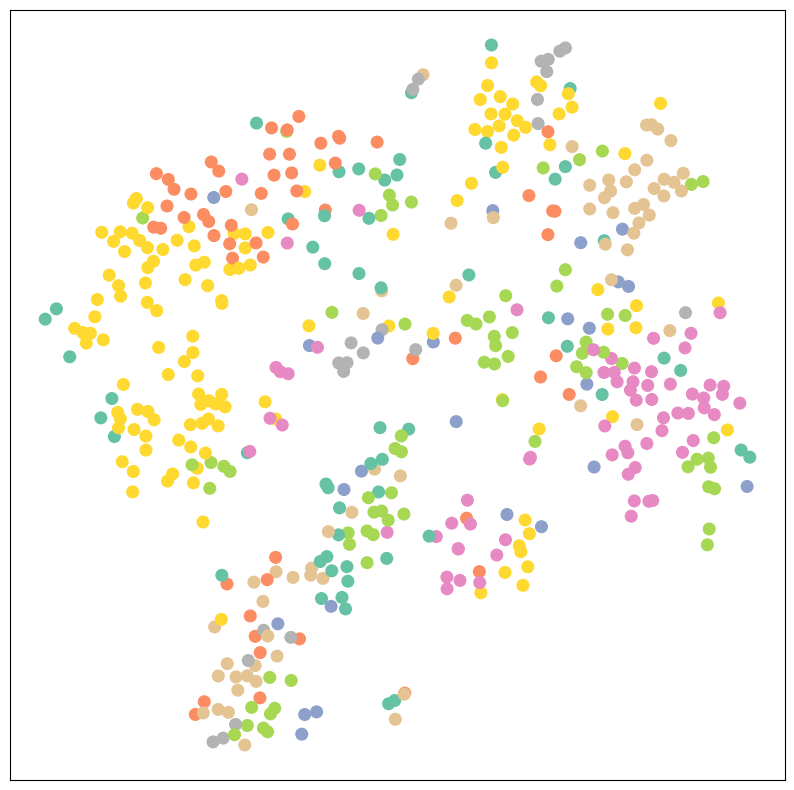

In [29]:
model.eval()
model.update_return_embeds(True)
out = model(data.x, data.adj_t)
out = out.cpu()
y = data.y.cpu()
num = 500
visualize(out[:num,], color=y[:num,])

## Question 5: What are your `best_model` validation and test accuracy? Please report them in the cell below. For example, for an accuracy such as 50.01%, just report 50.01 and please don't include the percent sign.

#### Validation accuracy: 71.59
#### Test accuracy: 70.75

# 4 GNN: Link Prediction on MovieLens

In this section we will create a graph neural network for link prediction.

This notebook shows how to load a set of `*.csv` files as input and construct a heterogeneous graph from it.
We will then use this dataset as input into a [heterogeneous graph model](https://pytorch-geometric.readthedocs.io/en/latest/notes/heterogeneous.html#hgtutorial), and use it for the task of link prediction.
A few code cells require user input to let the code run through successfully.

We are going to use the [MovieLens dataset](https://grouplens.org/datasets/movielens/) collected by the GroupLens research group.
This toy dataset describes ratings and tagging activity from MovieLens.
The dataset contains approximately 100k ratings across more than 9k movies from more than 600 users.
We are going to use this dataset to generate two node types holding data for movies and users, respectively, and one edge type connecting users and movies, representing the relation of whether a user has rated a specific movie.

The link prediction task then tries to predict missing ratings, and can, for example, be used to recommend users new movies.




In [30]:
import torch
from torch import Tensor
print(torch.__version__)

# Install required packages.
import os
os.environ['TORCH'] = torch.__version__

#!pip install torch-scatter -f https://data.pyg.org/whl/torch-${TORCH}.html
#!pip install torch-sparse -f https://data.pyg.org/whl/torch-${TORCH}.html
!pip install pyg-lib -f https://data.pyg.org/whl/nightly/torch-${TORCH}.html
!pip install git+https://github.com/pyg-team/pytorch_geometric.git

2.5.0+cu121
Looking in links: https://data.pyg.org/whl/nightly/torch-2.5.0+cu121.html
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 15.1 MB/s eta 0:00:00
  Cloning https://github.com/pyg-team/pytorch_geometric.git to /tmp/pip-req-build-q72a6nqd
  Running command git clone --filter=blob:none --quiet https://github.com/pyg-team/pytorch_geometric.git /tmp/pip-req-build-q72a6nqd
  Resolved https://github.com/pyg-team/pytorch_geometric.git to commit 0fa52cb408b6ad3627e200ba6161ca5c8571740b
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Created wheel for torch-geometric: filename=torch_geometric-2.7.0-py3-none-any.whl size=1136928 sha256=f490cf4f2a4660cd644f9fa25367a2cbff1e8e80d13f118067a5d5324a2e2937
  Stored in directory: /tmp/pip-ephem-wheel-cache-g40rb1dd/wheels/d3/78/eb/9e26525b948d19533f1688fb6c209cec8a0ba793d39b49ae8f
Successfully built torch-geometric
  Attempting uninstall: torch-geo

## Load and preprocess the dataset

First, we download the dataset to an arbitrary folder (in this case, the current directory):

In [31]:
from torch_geometric.data import download_url, extract_zip

url = 'https://files.grouplens.org/datasets/movielens/ml-latest-small.zip'
extract_zip(download_url(url, '.'), '.')

movies_path = './ml-latest-small/movies.csv'
ratings_path = './ml-latest-small/ratings.csv'

Extracting ./ml-latest-small.zip


Before we create the heterogeneous graph, let’s take a look at the data.

In [32]:
import pandas as pd

print('movies.csv:')
print('===========')
print(pd.read_csv(movies_path)[["movieId", "genres"]].head())
print()
print('ratings.csv:')
print('============')
print(pd.read_csv(ratings_path)[["userId", "movieId"]].head())

movies.csv:
   movieId                                       genres
0        1  Adventure|Animation|Children|Comedy|Fantasy
1        2                   Adventure|Children|Fantasy
2        3                               Comedy|Romance
3        4                         Comedy|Drama|Romance
4        5                                       Comedy

ratings.csv:
   userId  movieId
0       1        1
1       1        3
2       1        6
3       1       47
4       1       50


We see that the movies.csv file provides two useful columns:
- movieId assigns a unique identifier to each movie,
- while the genres column represent genres of the given movie.

We can make use of this column to define a feature representation that can be easily interpreted by machine learning models.

In [33]:
# Load the entire movie data frame into memory:
movies_df = pd.read_csv(movies_path, index_col='movieId')

# Split genres and convert into indicator variables:
genres = movies_df['genres'].str.get_dummies('|')
print(genres[["Action", "Adventure", "Drama", "Horror"]].head())

# Use genres as movie input features:
movie_feat = torch.from_numpy(genres.values).to(torch.float)
assert movie_feat.size() == (9742, 20)  # 20 genres in total.

         Action  Adventure  Drama  Horror
movieId                                  
1             0          1      0       0
2             0          1      0       0
3             0          0      0       0
4             0          0      1       0
5             0          0      0       0


The `ratings.csv` data connects users (as given by `userId`) and movies (as given by `movieId`).
Due to simplicity, we do not make use of the additional `timestamp` and `rating` information.
Here, we first read the `*.csv` file from disk, and create a mapping that maps entry IDs to a consecutive value in the range `{ 0, ..., num_rows - 1 }`.
This is needed as we want our final data representation to be as compact as possible, *e.g.*, the representation of a movie in the first row should be accessible via `x[0]`.

Afterwards, we obtain the final `edge_index` representation of shape `[2, num_ratings]` from `ratings.csv` by merging mapped user and movie indices with the raw indices given by the original data frame.

In [34]:
# Load the entire ratings data frame into memory:
ratings_df = pd.read_csv(ratings_path)

# Create a mapping from unique user indices to range [0, num_user_nodes):
unique_user_id = ratings_df['userId'].unique()
unique_user_id = pd.DataFrame(data={
    'userId': unique_user_id,
    'mappedID': pd.RangeIndex(len(unique_user_id)),
})
print("Mapping of user IDs to consecutive values:")
print("==========================================")
print(unique_user_id.head())
print()
# Create a mapping from unique movie indices to range [0, num_movie_nodes):
unique_movie_id = pd.DataFrame(data={
    'movieId': movies_df.index,
    'mappedID': pd.RangeIndex(len(movies_df)),
})
print("Mapping of movie IDs to consecutive values:")
print("===========================================")
print(unique_movie_id.head())

# Perform merge to obtain the edges from users and movies:
ratings_user_id = pd.merge(ratings_df['userId'], unique_user_id,
                            left_on='userId', right_on='userId', how='left')
ratings_user_id = torch.from_numpy(ratings_user_id['mappedID'].values)
ratings_movie_id = pd.merge(ratings_df['movieId'], unique_movie_id,
                            left_on='movieId', right_on='movieId', how='left')
ratings_movie_id = torch.from_numpy(ratings_movie_id['mappedID'].values)

# With this, we are ready to construct our `edge_index` in COO format
# following PyG semantics:
edge_index_user_to_movie = torch.stack([ratings_user_id, ratings_movie_id], dim=0)
assert edge_index_user_to_movie.size() == (2, 100836)

print()
print("Final edge indices pointing from users to movies:")
print("=================================================")
print(edge_index_user_to_movie)

Mapping of user IDs to consecutive values:
   userId  mappedID
0       1         0
1       2         1
2       3         2
3       4         3
4       5         4

Mapping of movie IDs to consecutive values:
   movieId  mappedID
0        1         0
1        2         1
2        3         2
3        4         3
4        5         4

Final edge indices pointing from users to movies:
tensor([[   0,    0,    0,  ...,  609,  609,  609],
        [   0,    2,    5,  ..., 9462, 9463, 9503]])


In [35]:
print(ratings_user_id)
print(ratings_movie_id)

tensor([  0,   0,   0,  ..., 609, 609, 609])
tensor([   0,    2,    5,  ..., 9462, 9463, 9503])


With this, we are ready to initialize our `HeteroData` object and pass the necessary information to it.

**Note**
- We also pass in a `node_id` vector to each node type in order to reconstruct the original node indices from sampled subgraphs.
- We also take care of adding reverse edges to the `HeteroData` object. This allows our GNN model to use both directions of the edge for message passing.

In [36]:
from torch_geometric.data import HeteroData
import torch_geometric.transforms as T

data = HeteroData()

# Save node indices:
data["user"].node_id = torch.arange(len(unique_user_id))
data["movie"].node_id = torch.arange(len(movies_df))

# Add the node features and edge indices:
############# Your code here ############
data["movie"].x = movie_feat  # TODO
data["user", "rates", "movie"].edge_index = edge_index_user_to_movie # TODO
#########################################

# We also need to make sure to add the reverse edges from movies to users
# in order to let a GNN be able to pass messages in both directions.
# We can leverage the `T.ToUndirected()` transform for this from PyG:

############# Your code here ############
data = T.ToUndirected()(data)
#########################################

print(data)
assert data.node_types == ["user", "movie"]
assert data.edge_types == [("user", "rates", "movie"),
                           ("movie", "rev_rates", "user")]
assert data["user"].num_nodes == 610
assert data["user"].num_features == 0
assert data["movie"].num_nodes == 9742
assert data["movie"].num_features == 20
assert data["user", "rates", "movie"].num_edges == 100836
assert data["movie", "rev_rates", "user"].num_edges == 100836

HeteroData(
  user={ node_id=[610] },
  movie={
    node_id=[9742],
    x=[9742, 20],
  },
  (user, rates, movie)={ edge_index=[2, 100836] },
  (movie, rev_rates, user)={ edge_index=[2, 100836] }
)


## Defining Edge-Level Training Splits

Since our data is now ready-to-be-used, we will split the ratings of users into training, validation, and test splits to ensure that we leak no information about edges used during evaluation into the training phase.

For this, we make use of the [`transforms.RandomLinkSplit`](https://pytorch-geometric.readthedocs.io/en/latest/modules/transforms.html#torch_geometric.transforms.RandomLinkSplit) transformation from PyG.

- This transforms randomly divides the edges in the `("user", "rates", "movie")` into training, validation and test edges.
- The `disjoint_train_ratio` parameter further separates edges in the training split into edges used for message passing (`edge_index`) and edges used for supervision (`edge_label_index`).
- Note that we also need to specify the reverse edge type `("movie", "rev_rates", "user")`. This allows the `RandomLinkSplit` transform to drop reverse edges accordingly to not leak any information into the training phase.

In [37]:
# For this, we first split the set of edges into
# training (80%), validation (10%), and testing edges (10%).
# Across the training edges, we use 70% of edges for message passing,
# and 30% of edges for supervision.
# We further want to generate fixed negative edges for evaluation with a ratio of 2:1.
# Negative edges during training will be generated on-the-fly, so we don't want to
# add them to the graph right away.
# Overall, we can leverage the `RandomLinkSplit()` transform for this from PyG:

############# Your code here ############
transform = T.RandomLinkSplit(
    num_val=0.1,  # TODO
    num_test=0.1,  # TODO
    disjoint_train_ratio=0.3,  # TODO
    neg_sampling_ratio=2.0,  # TODO
    add_negative_train_samples=False,  # TODO
    edge_types=("user", "rates", "movie"),
    rev_edge_types=("movie", "rev_rates", "user"),
)
#########################################

train_data, val_data, test_data = transform(data)
print("Training data:")
print("==============")
print(train_data)
print()
print("Validation data:")
print("================")
print(val_data)

assert train_data["user", "rates", "movie"].num_edges == 56469
assert train_data["user", "rates", "movie"].edge_label_index.size(1) == 24201
assert train_data["movie", "rev_rates", "user"].num_edges == 56469
# No negative edges added:
assert train_data["user", "rates", "movie"].edge_label.min() == 1
assert train_data["user", "rates", "movie"].edge_label.max() == 1

assert val_data["user", "rates", "movie"].num_edges == 80670
assert val_data["user", "rates", "movie"].edge_label_index.size(1) == 30249
assert val_data["movie", "rev_rates", "user"].num_edges == 80670
# Negative edges with ratio 2:1:
assert val_data["user", "rates", "movie"].edge_label.long().bincount().tolist() == [20166, 10083]

Training data:
HeteroData(
  user={ node_id=[610] },
  movie={
    node_id=[9742],
    x=[9742, 20],
  },
  (user, rates, movie)={
    edge_index=[2, 56469],
    edge_label=[24201],
    edge_label_index=[2, 24201],
  },
  (movie, rev_rates, user)={ edge_index=[2, 56469] }
)

Validation data:
HeteroData(
  user={ node_id=[610] },
  movie={
    node_id=[9742],
    x=[9742, 20],
  },
  (user, rates, movie)={
    edge_index=[2, 80670],
    edge_label=[30249],
    edge_label_index=[2, 30249],
  },
  (movie, rev_rates, user)={ edge_index=[2, 80670] }
)


## Defining Mini-Batch Loaders

We are now ready to create a mini-batch loader. The mini-batch loader will generate subgraphs that can be used as input into our GNN.

While this step is not necessary for small-scale graphs, it is absolutely necessary to apply GNNs on larger graphs that do not fit onto GPU memory otherwise.

We make use of the [`loader.LinkNeighborLoader`](https://pytorch-geometric.readthedocs.io/en/latest/modules/loader.html#torch_geometric.loader.LinkNeighborLoader) which samples multiple hops from both ends of a link and creates a subgraph from it.
Here, `edge_label_index` serves as the "seed links" to start sampling from.

In [43]:
# In the first hop, we sample at most 20 neighbors.
# In the second hop, we sample at most 10 neighbors.
# In addition, during training, we want to sample negative edges on-the-fly with
# a ratio of 2:1.
# We can make use of the `loader.LinkNeighborLoader` from PyG:
from torch_geometric.loader import LinkNeighborLoader

# Define seed edges:
edge_label_index = train_data["user", "rates", "movie"].edge_label_index
edge_label = train_data["user", "rates", "movie"].edge_label

############# Your code here ############
train_loader = LinkNeighborLoader(
    data=train_data,  # TODO
    num_neighbors=[20, 10],  # TODO
    neg_sampling_ratio=2.0,  # TODO
    edge_label_index=(("user", "rates", "movie"), edge_label_index),
    edge_label=edge_label,
    batch_size=128,
    shuffle=True,
)
#########################################


# Inspect a sample:
sampled_data = next(iter(train_loader))

print("Sampled mini-batch:")
print("===================")
print(sampled_data)

assert sampled_data["user", "rates", "movie"].edge_label_index.size(1) == 3 * 128
assert sampled_data["user", "rates", "movie"].edge_label.min() == 0
assert sampled_data["user", "rates", "movie"].edge_label.max() == 1

Sampled mini-batch:
HeteroData(
  user={
    node_id=[608],
    n_id=[608],
  },
  movie={
    node_id=[2764],
    x=[2764, 20],
    n_id=[2764],
  },
  (user, rates, movie)={
    edge_index=[2, 17456],
    edge_label=[384],
    edge_label_index=[2, 384],
    e_id=[17456],
    input_id=[128],
  },
  (movie, rev_rates, user)={
    edge_index=[2, 7685],
    e_id=[7685],
  }
)


/usr/local/lib/python3.10/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


## Creating a Heterogeneous Link-Level GNN

We are now ready to create our heterogeneous GNN.
The GNN is responsible for learning enriched node representations from the surrounding subgraphs, which can be then used to derive edge-level predictions.

- For defining our heterogenous GNN, we make use of [`nn.SAGEConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.SAGEConv) and the [`nn.to_hetero()`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.to_hetero_transformer.to_hetero) function, which transforms a GNN defined on homogeneous graphs to be applied on heterogeneous ones.

- In addition, we define a final link-level classifier, which simply takes both node embeddings of the link we are trying to predict, and applies a dot-product on them.

- As users do not have any node-level information, we choose to learn their features jointly via a `torch.nn.Embedding` layer. In order to improve the expressiveness of movie features, we do the same for movie nodes, and simply add their shallow embeddings to the pre-defined genre features.

In [44]:
from torch_geometric.nn import SAGEConv, to_hetero


class GNN(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()

        self.conv1 = SAGEConv(hidden_channels, hidden_channels)
        self.conv2 = SAGEConv(hidden_channels, hidden_channels)

    def forward(self, x: Tensor, edge_index: Tensor) -> Tensor:
        # Define a 2-layer GNN computation graph.
        # Use a *single* `ReLU` non-linearity in-between.
        ############# Your code here ############
        # TODO:
        x = self.conv1(x, edge_index)
        x = F.relu(x)
        x = self.conv2(x, edge_index)
        return x

        #########################################

# Our final classifier applies the dot-product between source and destination
# node embeddings to derive edge-level predictions:
class Classifier(torch.nn.Module):
    def forward(self, x_user: Tensor, x_movie: Tensor, edge_label_index: Tensor) -> Tensor:
        # Convert node embeddings to edge-level representations:
        edge_feat_user = x_user[edge_label_index[0]]
        edge_feat_movie = x_movie[edge_label_index[1]]

        # Apply dot-product to get a prediction per supervision edge:
        return (edge_feat_user * edge_feat_movie).sum(dim=-1)


class Model(torch.nn.Module):
    def __init__(self, hidden_channels):
        super().__init__()
        # Since the dataset does not come with rich features, we also learn two
        # embedding matrices for users and movies:
        self.movie_lin = torch.nn.Linear(20, hidden_channels)
        self.user_emb = torch.nn.Embedding(data["user"].num_nodes, hidden_channels)
        self.movie_emb = torch.nn.Embedding(data["movie"].num_nodes, hidden_channels)

        # Instantiate homogeneous GNN:
        self.gnn = GNN(hidden_channels)

        # Convert GNN model into a heterogeneous variant:
        self.gnn = to_hetero(self.gnn, metadata=data.metadata())

        self.classifier = Classifier()

    def forward(self, data: HeteroData) -> Tensor:
        x_dict = {
          "user": self.user_emb(data["user"].node_id),
          "movie": self.movie_lin(data["movie"].x) + self.movie_emb(data["movie"].node_id),
        }

        # `x_dict` holds feature matrices of all node types
        # `edge_index_dict` holds all edge indices of all edge types
        x_dict = self.gnn(x_dict, data.edge_index_dict)

        pred = self.classifier(
            x_dict["user"],
            x_dict["movie"],
            data["user", "rates", "movie"].edge_label_index,
        )

        return pred


model = Model(hidden_channels=64)

print(model)

Model(
  (movie_lin): Linear(in_features=20, out_features=64, bias=True)
  (user_emb): Embedding(610, 64)
  (movie_emb): Embedding(9742, 64)
  (gnn): GraphModule(
    (conv1): ModuleDict(
      (user__rates__movie): SAGEConv(64, 64, aggr=mean)
      (movie__rev_rates__user): SAGEConv(64, 64, aggr=mean)
    )
    (conv2): ModuleDict(
      (user__rates__movie): SAGEConv(64, 64, aggr=mean)
      (movie__rev_rates__user): SAGEConv(64, 64, aggr=mean)
    )
  )
  (classifier): Classifier()
)


## Training a Heterogeneous Link-Level GNN

Training our GNN is similar to training any PyTorch model.
1. We move the model to the desired device, and initialize an optimizer that takes care of adjusting model parameters via stochastic gradient descent.

2. The training loop then iterates over our mini-batches, applies the forward computation of the model, computes the loss from ground-truth labels and obtained predictions (here we make use of binary cross entropy), and adjusts model parameters via back-propagation and stochastic gradient descent.

In [46]:
import tqdm
import torch.nn.functional as F

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f"Device: '{device}'")

model = model.to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

for epoch in range(1, 6):
    total_loss = total_examples = 0
    for sampled_data in tqdm.tqdm(train_loader):
        optimizer.zero_grad()
        ############# Your code here ############
        # TODO: Move `sampled_data` to the respective `device`
        # TODO: Run `forward` pass of the model
        # TODO: Apply binary cross entropy via
        # `F.binary_cross_entropy_with_logits(pred, ground_truth)`
        sampled_data = sampled_data.to(device)
        pred = model(sampled_data)
        gt = sampled_data["user", "rates", "movie"].edge_label
        loss = F.binary_cross_entropy_with_logits(pred, gt)

        #########################################

        loss.backward()
        optimizer.step()
        total_loss += float(loss) * pred.numel()
        total_examples += pred.numel()
    print(f"Epoch: {epoch:03d}, Loss: {total_loss / total_examples:.4f}")

Device: 'cuda'


100%|██████████| 190/190 [00:08<00:00, 23.14it/s]


Epoch: 001, Loss: 0.4424


100%|██████████| 190/190 [00:07<00:00, 26.58it/s]


Epoch: 002, Loss: 0.3481


100%|██████████| 190/190 [00:08<00:00, 22.78it/s]


Epoch: 003, Loss: 0.3309


100%|██████████| 190/190 [00:12<00:00, 15.81it/s]


Epoch: 004, Loss: 0.3146


100%|██████████| 190/190 [00:11<00:00, 16.42it/s]

Epoch: 005, Loss: 0.3021


## Evaluating a Heterogeneous Link-Level GNN

After training, we evaluate our model on useen data coming from the validation set.

- For this, we define a new `LinkNeighborLoader` (which now iterates over the edges in the validation set), obtain the predictions on validation edges by running the model, and finally evaluate the performance of the model by computing the AUC score over the set of predictions and their corresponding ground-truth edges (including both positive and negative edges).

In [47]:
# Define the validation seed edges:
edge_label_index = val_data["user", "rates", "movie"].edge_label_index
edge_label = val_data["user", "rates", "movie"].edge_label

val_loader = LinkNeighborLoader(
    data=val_data,
    num_neighbors=[20, 10],
    edge_label_index=(("user", "rates", "movie"), edge_label_index),
    edge_label=edge_label,
    batch_size=3 * 128,
    shuffle=False,
)

sampled_data = next(iter(val_loader))

print("Sampled mini-batch:")
print("===================")
print(sampled_data)

assert sampled_data["user", "rates", "movie"].edge_label_index.size(1) == 3 * 128
assert sampled_data["user", "rates", "movie"].edge_label.min() >= 0
assert sampled_data["user", "rates", "movie"].edge_label.max() <= 1

Sampled mini-batch:
HeteroData(
  user={
    node_id=[606],
    n_id=[606],
  },
  movie={
    node_id=[2605],
    x=[2605, 20],
    n_id=[2605],
  },
  (user, rates, movie)={
    edge_index=[2, 19109],
    edge_label=[384],
    edge_label_index=[2, 384],
    e_id=[19109],
    input_id=[384],
  },
  (movie, rev_rates, user)={
    edge_index=[2, 7691],
    e_id=[7691],
  }
)


/usr/local/lib/python3.10/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "


In [49]:
from sklearn.metrics import roc_auc_score

preds = []
ground_truths = []
for sampled_data in tqdm.tqdm(val_loader):
    with torch.no_grad():
        ############# Your code here ############
        # TODO: Collect predictions and ground-truths and write them into
        # `preds` and `ground_truths`.
        sampled_data = sampled_data.to(device)
        pred = model(sampled_data)
        gt = sampled_data["user", "rates", "movie"].edge_label
        preds.append(pred)
        ground_truths.append(gt)

        #########################################

pred = torch.cat(preds, dim=0).cpu().numpy()
ground_truth = torch.cat(ground_truths, dim=0).cpu().numpy()
auc = roc_auc_score(ground_truth, pred)
print()
print(f"Validation AUC: {auc:.4f}")

100%|██████████| 79/79 [00:03<00:00, 25.64it/s]



Validation AUC: 0.9300


In [50]:
test_loader = LinkNeighborLoader(
    data=test_data,
    num_neighbors=[20, 10],
    edge_label_index=(("user", "rates", "movie"), edge_label_index),
    edge_label=test_data["user", "rates", "movie"].edge_label,
    batch_size=3 * 128,
    shuffle=False,
)

preds = []
ground_truths = []
for sampled_data in tqdm.tqdm(test_loader):
    with torch.no_grad():
        ############# Your code here ############
        # TODO: Collect predictions and ground-truths and write them into
        # `preds` and `ground_truths`.
        sampled_data = sampled_data.to(device)
        pred = model(sampled_data)
        gt = sampled_data["user", "rates", "movie"].edge_label
        preds.append(pred)
        ground_truths.append(gt)

        #########################################

pred = torch.cat(preds, dim=0).cpu().numpy()
ground_truth = torch.cat(ground_truths, dim=0).cpu().numpy()
auc = roc_auc_score(ground_truth, pred)
print()
print(f"Test AUC: {auc:.4f}")

/usr/local/lib/python3.10/dist-packages/torch_geometric/sampler/neighbor_sampler.py:61: UserWarning: Using 'NeighborSampler' without a 'pyg-lib' installation is deprecated and will be removed soon. Please install 'pyg-lib' for accelerated neighborhood sampling
  warnings.warn(f"Using '{self.__class__.__name__}' without a "
100%|██████████| 79/79 [00:04<00:00, 18.13it/s]


Test AUC: 0.9348


## Question 6: What are your `best_model`'s validation and test ROC-AUC score? Please report them in the cell below. For example, for an ROC-AUC score such as 50.01%, just report 50.01 and please don't include the percent sign.

#### Validation ROC-AUC score: 93.00
#### Test ROC-AUC score: 93.48